## **IMPORTS**

In [121]:
# Data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning models


PATH = "../data/Sleep_Efficiency.csv"
TARGET = "Sleep efficiency"

In [122]:
df = pd.read_csv(filepath_or_buffer=PATH).drop(columns="ID")
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [123]:
df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


## **EXPLORATION DATA ANALYSIS**

### MISSING DATA ANALYSIS

In [124]:
pd.DataFrame(
    data={
        "Faltante (abs)":df.isnull().sum(),
        "Faltante (%)":round(((df.isnull().sum() /df.shape[0])*100),2)
    }
)

,Faltante (abs),Faltante (%)
Age,0,0.00
Gender,0,0.00
Bedtime,0,0.00
Wakeup time,0,0.00
Sleep duration,0,0.00
Sleep efficiency,0,0.00
REM sleep percentage,0,0.00
Deep sleep percentage,0,0.00
Light sleep percentage,0,0.00
Awakenings,20,4.42


### REGRESSION PLOT ANALYSIS

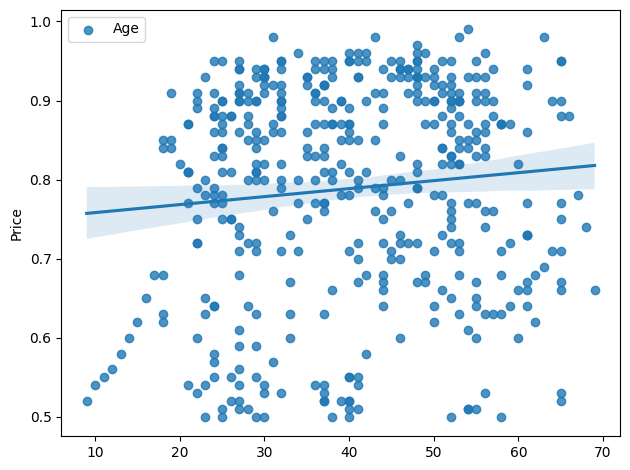

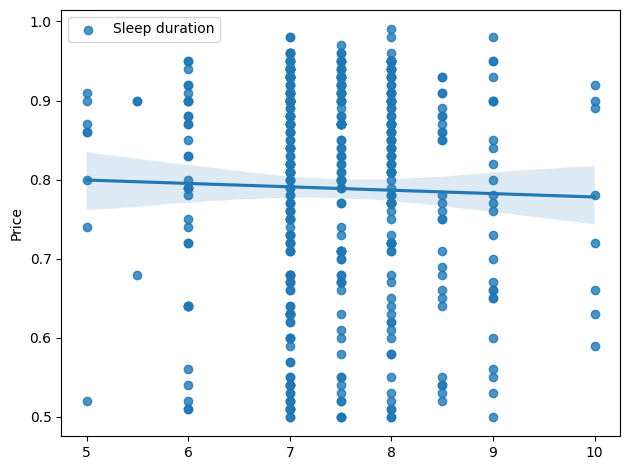

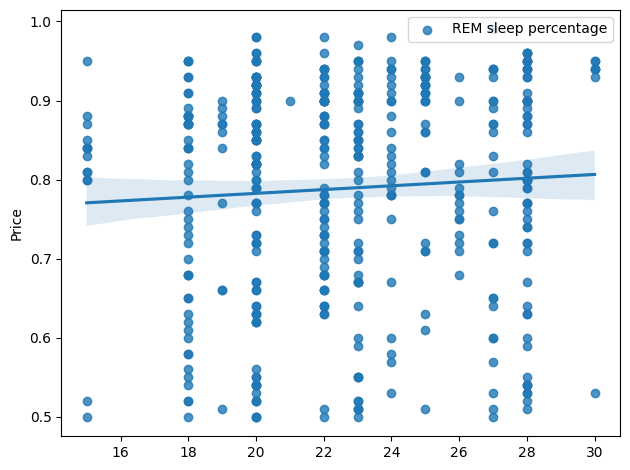

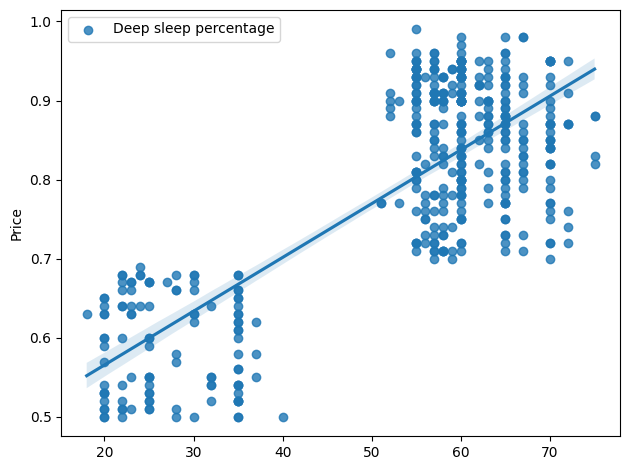

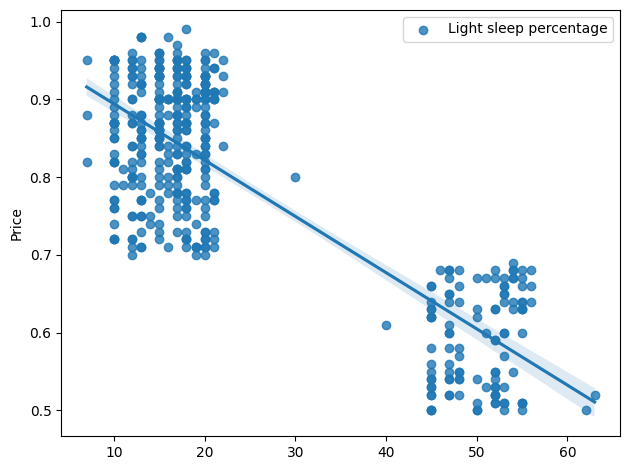

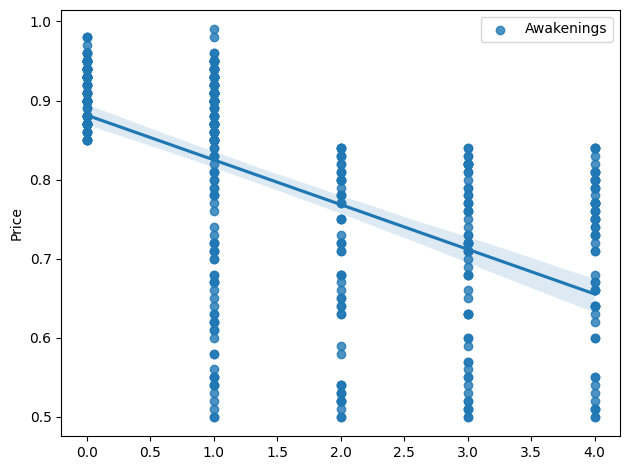

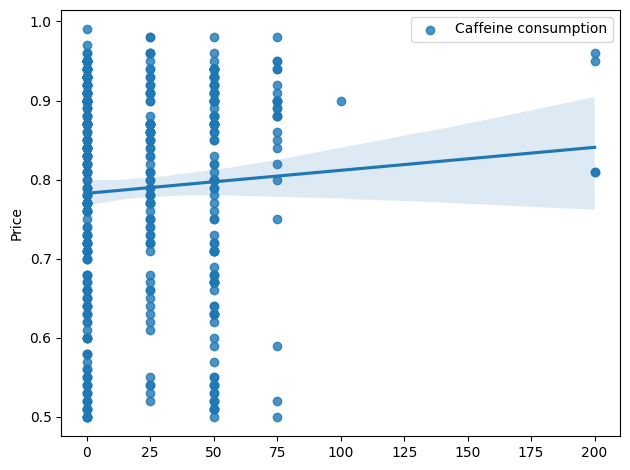

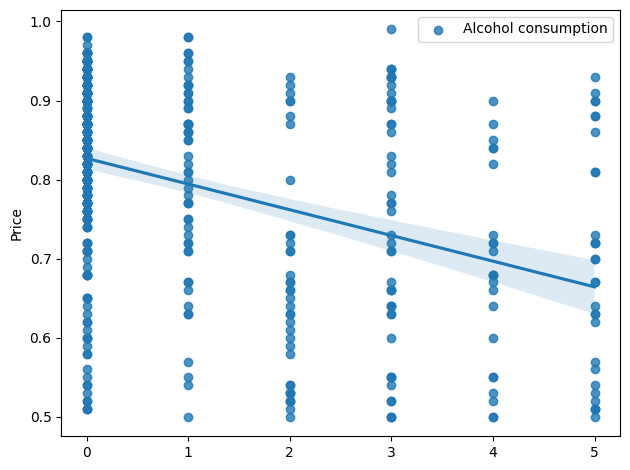

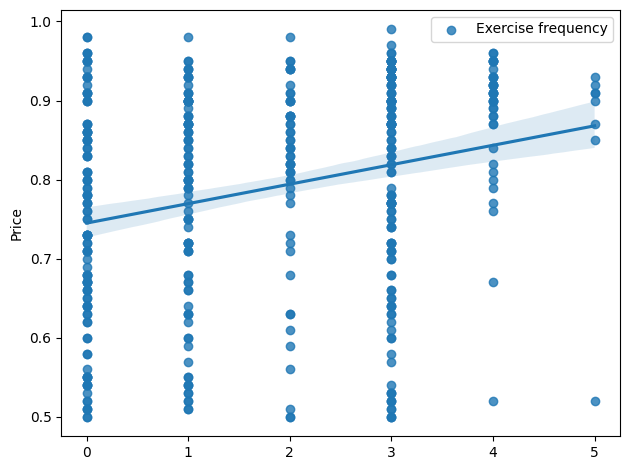

In [125]:
target = df[TARGET]
# we use a for loop to plot our independent variables against our dependent one:
for col in df.drop(
        columns=["Gender", "Smoking status", "Bedtime", "Wakeup time", TARGET]
    ):
    sns.regplot(x=df[col], y=target, data=df, label=col)
    plt.ylabel('Price')
    plt.xlabel('')
    plt.legend()
    plt.tight_layout()
    plt.show()


### BOXPLOT TARGET COLUMN

<Axes: ylabel='Sleep efficiency'>

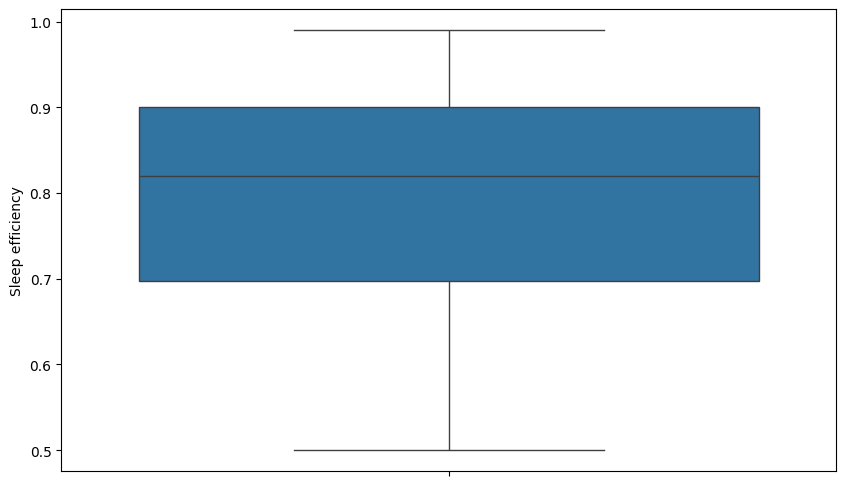

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(df[TARGET])

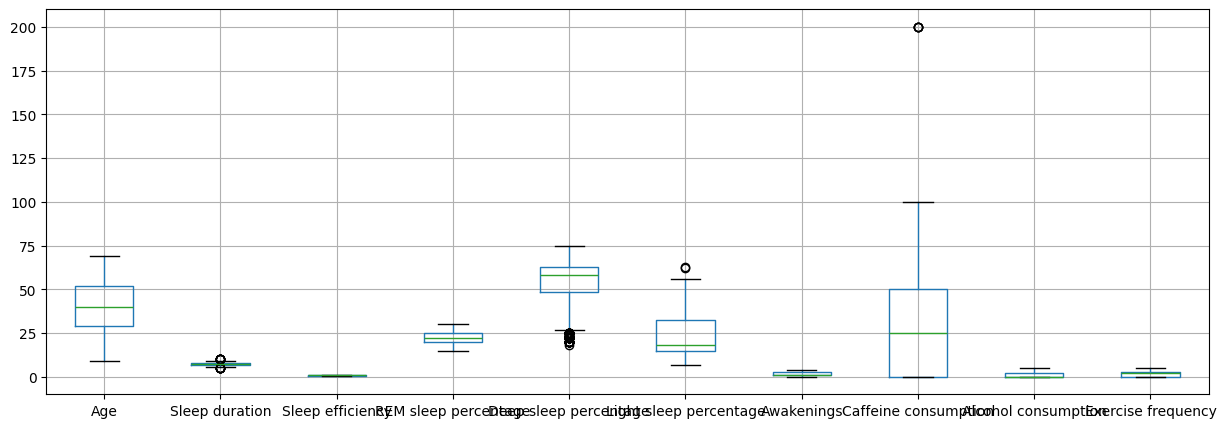

In [127]:
df.boxplot(figsize=(15, 5))
plt.show()

### HISTOGRAM TARGET COLUMN

<Axes: xlabel='Sleep efficiency', ylabel='Count'>

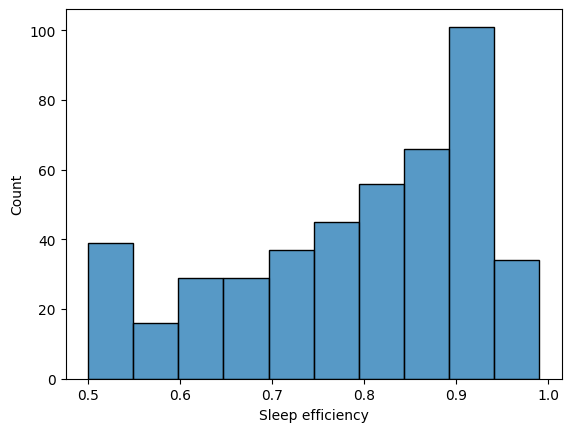

In [128]:
sns.histplot(df[TARGET])

### HISTOGRAM ALL COLUMNS

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep duration'}>,
        <Axes: title={'center': 'Sleep efficiency'}>],
       [<Axes: title={'center': 'REM sleep percentage'}>,
        <Axes: title={'center': 'Deep sleep percentage'}>,
        <Axes: title={'center': 'Light sleep percentage'}>],
       [<Axes: title={'center': 'Awakenings'}>,
        <Axes: title={'center': 'Caffeine consumption'}>,
        <Axes: title={'center': 'Alcohol consumption'}>],
       [<Axes: title={'center': 'Exercise frequency'}>, <Axes: >,
        <Axes: >]], dtype=object)

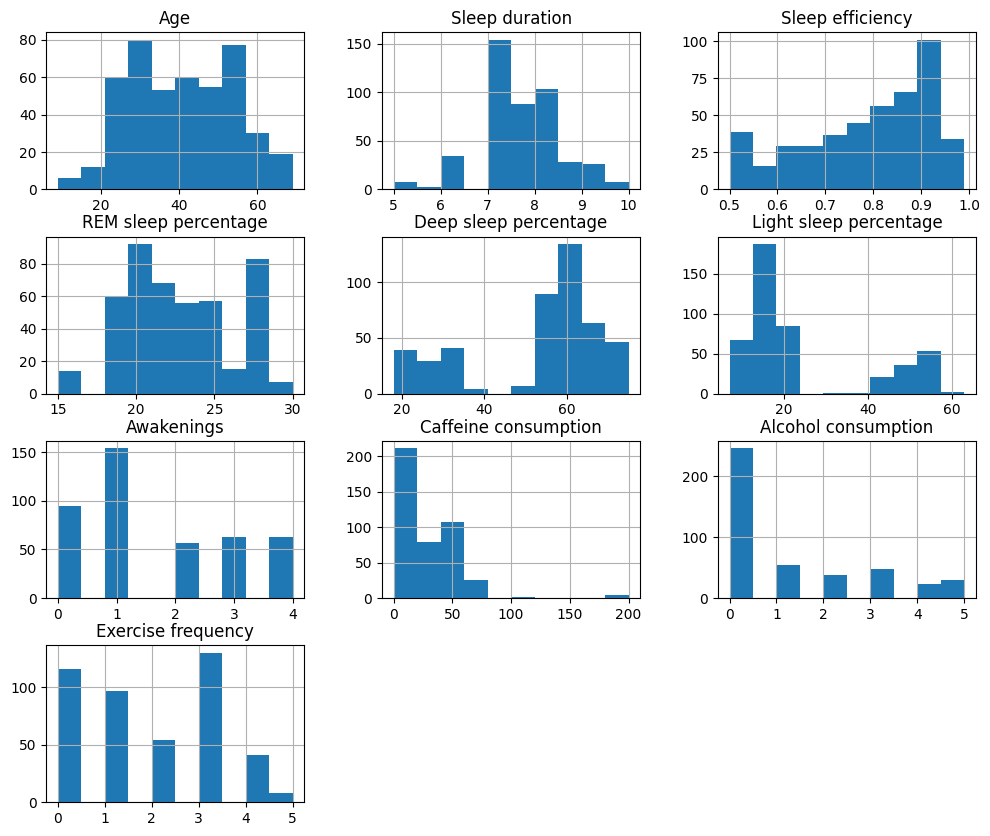

In [129]:
df.hist(figsize=(12, 10))

### CORRELATION MATRIX

Text(0.5, 1.0, 'Mapa Térmico da Correlação')

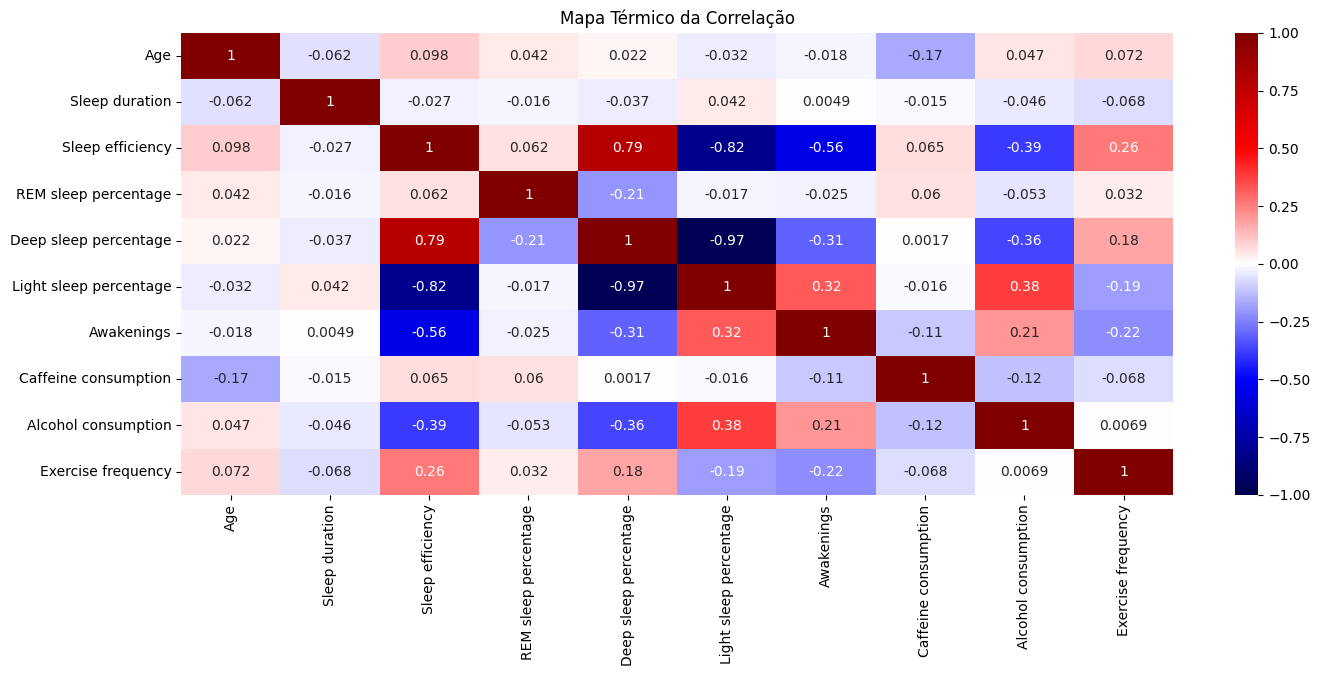

In [130]:
plt.figure(figsize=(16,6))
heatmap_corr = sns.heatmap(
    df.drop(
        columns=["Gender", "Smoking status", "Bedtime", "Wakeup time"]
    ).corr(),
    cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Correlação')

## **PRE-PROCESSING**

### ONE HOT ENCONDING

In [131]:
df = pd.concat([df, pd.get_dummies(data=df["Gender"])], axis=1)
df = pd.concat([df, pd.get_dummies(data=df["Smoking status"], prefix="Smoking")], axis=1)

df = df.drop(columns=["Gender", "Smoking status"])

### FILL MISSING DATA WITH LOCAL METRICS

In [132]:
pd.DataFrame(
    data={
        "Faltante (abs)":df.isnull().sum()[(df.isnull().sum() > 0)],
        "Faltante (%)":round(((df.isnull().sum()[(df.isnull().sum() > 0)] /df.shape[0])*100),2),
        "Média": df.drop(columns=["Bedtime", "Wakeup time"]).mean()[(df.isnull().sum() > 0)],
        "Mediana": df.drop(columns=["Bedtime", "Wakeup time"]).median()[(df.isnull().sum() > 0)]
    }
)

,Faltante (abs),Faltante (%),Média,Mediana
Awakenings,20,4.42,1.641204,1.0
Caffeine consumption,25,5.53,23.653396,25.0
Alcohol consumption,14,3.10,1.173516,0.0
Exercise frequency,6,1.33,1.791480,2.0


In [133]:
df["Awakenings"] = df["Awakenings"].fillna(df["Awakenings"].median())
df["Caffeine consumption"] = df["Caffeine consumption"].fillna(df["Caffeine consumption"].median())
df["Alcohol consumption"] = df["Alcohol consumption"].fillna(df["Alcohol consumption"].mean())
df["Exercise frequency"] = df["Exercise frequency"].fillna(df["Exercise frequency"].mean())

### DATA TYPES DEFINITION

In [134]:
df = df.astype({
    'Age': "float",
    'Sleep duration': "float",
    'Sleep efficiency': "float",
    'REM sleep percentage': "float",
    'Deep sleep percentage': "float",
    'Light sleep percentage': "float",
    'Awakenings': "int",
    'Caffeine consumption': "float",
    'Alcohol consumption': "float",
    'Exercise frequency': "int",
    'Female': "int",
    'Male': "int",
    'Smoking_No': "int",
    'Smoking_Yes': "int"
})
df["Wakeup time"] = pd.to_datetime(df["Wakeup time"])
df["Bedtime"] = pd.to_datetime(df["Bedtime"])

### FEATURE ENGINEERING

#### Creating boolean column to track if person sleep at midnight

In [135]:
df.loc[(df["Bedtime"].dt.hour >= 0) & (df["Bedtime"].dt.hour <= 5), "Bedtime_Midnight"] = 1
df["Bedtime_Midnight"] = df["Bedtime_Midnight"].fillna(value=0)

### DATA CLEANING

In [136]:
df = df.drop(columns=["Bedtime", "Wakeup time"])

### COLUMNS NAME TREATMENT

In [137]:
df.columns = df.columns.str.replace(" ", "_")

### SAMPLING DATA

In [138]:
X = df.drop(columns="Sleep_efficiency")
y = df["Sleep_efficiency"]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2025, shuffle=True)

### DATA NORMALIZATION (Z-Score)

In [140]:
scaler = StandardScaler().fit(X_train) # Calculated mean and std from train set
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test) # Apply normalization with mean and std from train set

In [141]:
df_train = pd.DataFrame(columns=X_train.columns, data=X_train_norm)
df_train["Sleep_efficiency"] = y_train.values

df_test = pd.DataFrame(columns=X_test.columns, data=X_test_norm)
df_test["Sleep_efficiency"] = y_test.values

### SAVING PROCESSED DATA

In [142]:
df_train.to_csv("../data/train.csv")
df_test.to_csv("../data/test.csv")